<a href="https://colab.research.google.com/github/lilrachel1985/Cancer/blob/main/cervicalcancer_KerasNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential,Model
from keras.layers import Lambda,Dense, Activation,Input, Concatenate, Dropout,Flatten
from sklearn.model_selection import  train_test_split
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from keras.utils import Sequence
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
from time import time
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('cervical_cancer2.csv')

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features = df.columns[1:31]


In [5]:
df[features].shape

(858, 30)

In [6]:
df[features]
df['Biopsy']

0      0
1      0
2      0
3      0
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Biopsy'].values, test_size=0.30, random_state=42)

In [8]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))


# Adding the third hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [9]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()

In [10]:
scaler = StandardScaler()

In [11]:
X_train.shape

(600, 30)

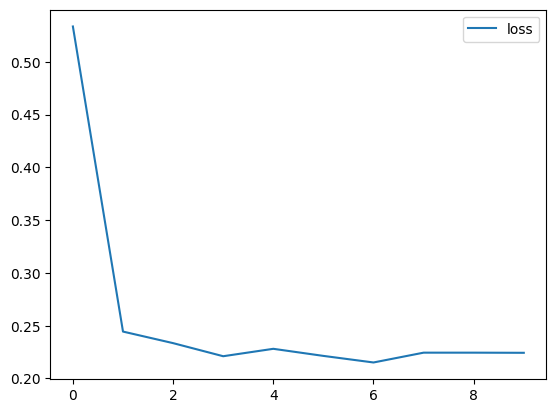

120/120 [==============================] - 1s 10ms/step - loss: 0.2243 - accuracy: 0.9333


In [12]:
scaler = StandardScaler()

classifier.fit(scaler.fit_transform(X_train.values), np.array(y_train),batch_size = 5,epochs=10,callbacks=[plot_losses])


In [13]:
from keras.models import load_model

classifier.save('cervical_cancer_model.h5') #Save trained ANN

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# define the keras model
model = Sequential([
    Dense(32, activation='relu', input_shape=(30,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [28]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)


Epoch 1/150
60/60 [==============================] - 1s 2ms/step - loss: 0.3123 - accuracy: 0.9150
Epoch 2/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9333
Epoch 3/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9333
Epoch 4/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9333
Epoch 5/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9333
Epoch 6/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9350
Epoch 7/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9350
Epoch 8/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9350
Epoch 9/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9333
Epoch 10/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9350
Epoch 11/

In [30]:
#model 2
model = Sequential([
    Dense(32, activation='relu', input_shape=(30,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [31]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [33]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

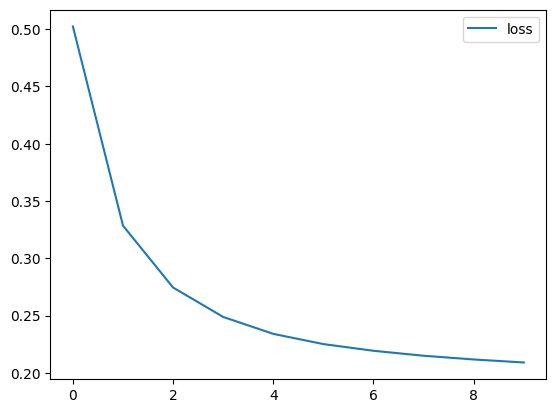

120/120 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.9367


In [34]:
hist = model.fit(scaler.fit_transform(X_train.values), np.array(y_train),
          batch_size=5, epochs=10,callbacks=[plot_losses])

In [60]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [67]:
# evaluate the model
import tensorflow as tf
precision, recall = model.evaluate(X_test, y_test, verbose=0)
tf.keras.metrics.Accuracy()

In [68]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9419


[0.2557642161846161, 0.9418604373931885]

In [69]:
model.evaluate(X_test, y_test)[1]

9/9 [==============================] - 0s 3ms/step - loss: 0.2558 - accuracy: 0.9419


0.9418604373931885

In [38]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
60/60 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.9283
Epoch 2/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.9333
Epoch 3/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9317
Epoch 4/150
60/60 [==============================] - 0s 1ms/step - loss: 0.2523 - accuracy: 0.9333
Epoch 5/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9333
Epoch 6/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.9333
Epoch 7/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9333
Epoch 8/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9317
Epoch 9/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9333
Epoch 10/150
60/60 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9333
Epoch 11/

In [43]:
keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adagrad.py:84: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adadelta.py:82: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics

In [45]:
X = df.drop(["Biopsy"], axis=1)
y = df["Biopsy"]
y = y.values
print(X,y)

     Age  Number of sexual partners  First sexual intercourse  \
0     18                          4                        15   
1     15                          1                        14   
2     34                          1                         0   
3     52                          5                        16   
4     46                          3                        21   
..   ...                        ...                       ...   
853   34                          3                        18   
854   32                          2                        19   
855   25                          2                        17   
856   33                          2                        24   
857   29                          2                        20   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                     1       0             0.0                  0.0   
1                     1       0             0.0                  0.0   
2  

In [46]:
from keras import regularizers

In [47]:
## input layer
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)



In [48]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [49]:
from sklearn import preprocessing
x_scale = preprocessing.MinMaxScaler().fit_transform(X.values)
x_can, x_ncan = x_scale[y == 0], x_scale[y == 1]

In [50]:
autoencoder.fit(x_can[0:2000], x_can[0:2000],
                batch_size = 256, epochs = 10,
                shuffle = True, validation_split = 0.20);

Epoch 1/10
3/3 [==============================] - 1s 94ms/step - loss: 0.0491 - val_loss: 0.0468
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0491 - val_loss: 0.0468
Epoch 3/10
3/3 [==============================] - 0s 22ms/step - loss: 0.0491 - val_loss: 0.0468
Epoch 4/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0491 - val_loss: 0.0468
Epoch 5/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0491 - val_loss: 0.0468
Epoch 6/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0491 - val_loss: 0.0468
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0491 - val_loss: 0.0468
Epoch 8/10
3/3 [==============================] - 0s 27ms/step - loss: 0.0491 - val_loss: 0.0468
Epoch 9/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0491 - val_loss: 0.0468
Epoch 10/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0491 - val_loss: 0.0467


In [51]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [52]:
can_hid_rep = hidden_representation.predict(x_can[:3000])
ncan_hid_rep = hidden_representation.predict(x_ncan)

2/2 [==============================] - 0s 7ms/step


In [53]:
import numpy as np
from sklearn.manifold import TSNE


In [54]:
rep_x = np.append(can_hid_rep, ncan_hid_rep, axis = 0)
y_n = np.zeros(can_hid_rep.shape[0])
y_f = np.ones(ncan_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
#tsne_plot(rep_x, rep_y, "latent_representation.png")


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       207
         1.0       0.62      0.62      0.62         8

    accuracy                           0.97       215
   macro avg       0.81      0.81      0.81       215
weighted avg       0.97      0.97      0.97       215


Accuracy Score:  0.9720930232558139


In [56]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold =roc_curve(val_y,pred_y)

In [57]:
from sklearn.metrics import auc
auc_keras=auc(fpr,tpr)

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
print ("")
#print ("Classification Report: ")
#print (classification_report(val_y, y_pred_rf))

#print ("")
#print ("Accuracy Score: ", accuracy_score(y_train, y_pred_rf))

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)



Text(0.5, 0, 'False Positive Rate')

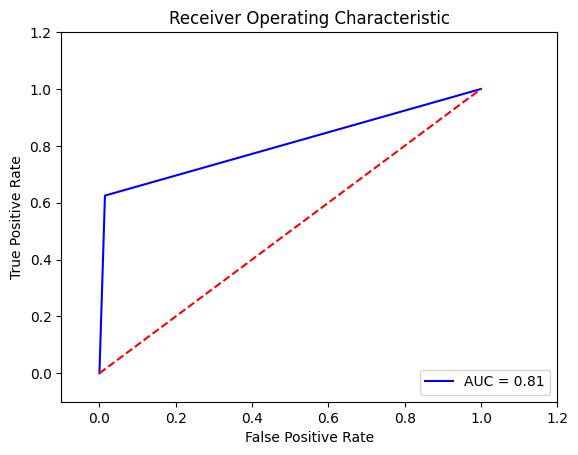

In [59]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% auc_keras)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
